In [93]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.signal import detrend
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Data Processing 

In [94]:
sales_data = pd.read_csv('Data/sales dataset.csv')
sales_data['salesDate'] = pd.to_datetime(sales_data['salesDate'], infer_datetime_format=True)
selected_columns1 =['salesAmount', 'salesDate']
sales_data = sales_data[selected_columns1]
##########################################################################

In [95]:
# The function groups either the expense or sales data into the daily series
# But the first column must be the amount and the second column must be the dates in datetime format
def groupDay(df):
    df['Year'] = df.iloc[:,1].dt.year
    df['Month'] = df.iloc[:,1].dt.month
    df['Day'] = df.iloc[:,1].dt.day
    df['Amount'] = df.iloc[:,0]
    daily = df.groupby(['Year','Month','Day'])['Amount'].sum().reset_index()
    return daily

def dailyToSingleDate(df,Year, Month, Day):
    days = []
    df['date'] = pd.to_datetime(df[['Year','Month','Day']])
    df = df.drop(['Year','Month','Day'], axis=1)
    
    for date in df['date']:
        day_name = date.day_name()
    
        if day_name == 'Sunday':
            days.append('Monday')
        else:
            days.append(day_name)
    df['day_of_week'] = days
#     df = df.set_index('date')   
    return df

In [96]:
sd = groupDay(sales_data)
daily_sales = dailyToSingleDate(sd, sd['Year'], sd['Month'], sd['Day'])

In [97]:
dailySales = daily_sales    #705 for the removal of irrelevant data points
# dailyExpenses = daily_expenses[890:]  #890 for the removal of irrelevant data points
# monthlySales = monthly_sales
# monthlyExpenses = monthly_expenses

In [98]:
category1 = dailySales
category = category1
category

,Amount,date,day_of_week
0,504170,2020-10-27,Tuesday
1,439435,2020-10-28,Wednesday
2,491330,2020-10-29,Thursday
3,560504,2020-10-30,Friday
4,1197790,2020-10-31,Saturday
...,...,...,...
936,1396202,2023-11-06,Monday
937,1441488,2023-11-07,Tuesday
938,1867192,2023-11-08,Wednesday
939,1401098,2023-11-09,Thursday


# Remove Outliers

In [99]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    filtered_data = data[(z_scores < threshold)]
    return filtered_data

filteredCategory = remove_outliers_zscore(category['Amount'])
category['Amount'] = filteredCategory
category = category.tail(30)

In [100]:
# category.reset_index(inplace=True)
# category = pd.DataFrame(category['Amount'])
# Category = category

# Encoding 

In [101]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

def onehot(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = pd.get_dummies(df, columns=['day_of_week'], prefix='day').dropna()
    return df

def ordinal(df):
    df['day_of_the_week_encoded'] = df['day_of_week'].map(day_mapping)
    selected_columns = ['Amount','day_of_the_week_encoded']
    df = df[selected_columns].dropna()
    return df

In [102]:
category = onehot(category)

C:\Users\Berlin\AppData\Local\Temp\ipykernel_10988\4153822253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [103]:
category

,Amount,day_Friday,day_Monday,day_Saturday,day_Thursday,day_Tuesday,day_Wednesday
date,,,,,,,
2023-10-07,1224978.0,0,0,1,0,0,0
2023-10-09,1158278.0,0,1,0,0,0,0
2023-10-10,1168275.0,0,0,0,0,1,0
2023-10-11,1802021.0,0,0,0,0,0,1
2023-10-12,1120984.0,0,0,0,1,0,0
2023-10-13,961789.0,1,0,0,0,0,0
2023-10-14,1102110.0,0,0,1,0,0,0
2023-10-16,734380.0,0,1,0,0,0,0
2023-10-17,1471970.0,0,0,0,0,1,0


# Adding Lagged Variables

In [57]:
lags = [1,2,3,4]
for lag in lags:
    category[f'lag{lag}'] = category['Amount'].shift(lag)
category.dropna(inplace=True)
selected_columns = ['Amount', 'lag1', 'lag2', 'lag3','lag4','day_Friday','day_Monday','day_Saturday','day_Thursday','day_Tuesday','day_Wednesday']
# selected_columns = ['Amount', 'lag1', 'lag2', 'lag3','day_of_the_week_encoded']
category = category[selected_columns]

In [58]:
category

,Amount,lag1,lag2,lag3,lag4,day_Friday,day_Monday,day_Saturday,day_Thursday,day_Tuesday,day_Wednesday
date,,,,,,,,,,,
2023-10-12,1120984.0,1802021.0,1168275.0,1158278.0,1224978.0,0,0,0,1,0,0
2023-10-13,961789.0,1120984.0,1802021.0,1168275.0,1158278.0,1,0,0,0,0,0
2023-10-14,1102110.0,961789.0,1120984.0,1802021.0,1168275.0,0,0,1,0,0,0
2023-10-16,734380.0,1102110.0,961789.0,1120984.0,1802021.0,0,1,0,0,0,0
2023-10-17,1471970.0,734380.0,1102110.0,961789.0,1120984.0,0,0,0,0,1,0
2023-10-18,1024476.0,1471970.0,734380.0,1102110.0,961789.0,0,0,0,0,0,1
2023-10-19,2089404.0,1024476.0,1471970.0,734380.0,1102110.0,0,0,0,1,0,0
2023-10-20,1345410.0,2089404.0,1024476.0,1471970.0,734380.0,1,0,0,0,0,0
2023-10-21,596444.0,1345410.0,2089404.0,1024476.0,1471970.0,0,0,1,0,0,0


In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(category.drop(category.columns[0], axis=1))
y = scaler.fit_transform(np.array(category.iloc[:,0]).reshape(-1, 1))

# PCA

In [60]:
# n_components = 1
# pca = PCA(n_components=n_components)
# X = pca.fit_transform(X)

# Train, Test, Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [62]:
X_test

array([[-1.4800668 , -1.30085037,  1.22032046,  0.61481042, -0.5       ,
         2.29128785, -0.43643578, -0.43643578, -0.43643578, -0.43643578],
       [ 0.16468337, -1.46253115, -1.27724188,  1.23888288, -0.5       ,
        -0.43643578, -0.43643578, -0.43643578,  2.29128785, -0.43643578],
       [ 0.24654497,  0.18143097, -1.44249703, -1.26386917, -0.5       ,
        -0.43643578, -0.43643578, -0.43643578, -0.43643578,  2.29128785],
       [ 1.01607227,  0.26325336,  0.23780904, -1.4294677 , -0.5       ,
        -0.43643578, -0.43643578,  2.29128785, -0.43643578, -0.43643578],
       [ 0.17353366,  1.03241195,  0.32144031,  0.25432989,  2.        ,
        -0.43643578, -0.43643578, -0.43643578, -0.43643578, -0.43643578]])

In [63]:
# len(X_train)
# # len(X_test)
# len(X_val)

# Reshape for LSTM input

In [64]:
X_train_scaled_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_scaled_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# X_val_scaled_reshaped = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Fit the model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

In [84]:
model = Sequential()
model.add(LSTM(units=550, kernel_regularizer=L2(0.09),return_sequences=True, activation='tanh', input_shape=(X_train_scaled_reshaped.shape[1], X_train_scaled_reshaped.shape[2])))
model.add(LSTM(units=250, kernel_regularizer=L2(0.09),activation='tanh'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [85]:
# cp = ModelCheckpoint('Models Pickled Flies/Sales Day Prediction Model(PCA and Standardization)/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics = [RootMeanSquaredError()])

In [86]:
model.fit(X_train_scaled_reshaped, y_train, epochs=150)

Epoch 1/150
1/1 [==============================] - 8s 8s/step - loss: 66.8627 - root_mean_squared_error: 1.0811
Epoch 2/150
1/1 [==============================] - 0s 124ms/step - loss: 63.7223 - root_mean_squared_error: 1.0754
Epoch 3/150
1/1 [==============================] - 0s 100ms/step - loss: 60.6878 - root_mean_squared_error: 1.0709
Epoch 4/150
1/1 [==============================] - 0s 100ms/step - loss: 57.7583 - root_mean_squared_error: 1.0668
Epoch 5/150
1/1 [==============================] - 0s 101ms/step - loss: 54.9327 - root_mean_squared_error: 1.0631
Epoch 6/150
1/1 [==============================] - 0s 113ms/step - loss: 52.2100 - root_mean_squared_error: 1.0597
Epoch 7/150
1/1 [==============================] - 0s 121ms/step - loss: 49.5889 - root_mean_squared_error: 1.0562
Epoch 8/150
1/1 [==============================] - 0s 105ms/step - loss: 47.0679 - root_mean_squared_error: 1.0528
Epoch 9/150
1/1 [==============================] - 0s 112ms/step - loss: 44.6455 - 

1/1 [==============================] - 0s 114ms/step - loss: 0.7584 - root_mean_squared_error: 0.5809
Epoch 73/150
1/1 [==============================] - 0s 120ms/step - loss: 0.7252 - root_mean_squared_error: 0.5797
Epoch 74/150
1/1 [==============================] - 0s 139ms/step - loss: 0.6949 - root_mean_squared_error: 0.5786
Epoch 75/150
1/1 [==============================] - 0s 129ms/step - loss: 0.6675 - root_mean_squared_error: 0.5777
Epoch 76/150
1/1 [==============================] - 0s 131ms/step - loss: 0.6425 - root_mean_squared_error: 0.5771
Epoch 77/150
1/1 [==============================] - 0s 135ms/step - loss: 0.6198 - root_mean_squared_error: 0.5767
Epoch 78/150
1/1 [==============================] - 0s 112ms/step - loss: 0.5991 - root_mean_squared_error: 0.5762
Epoch 79/150
1/1 [==============================] - 0s 117ms/step - loss: 0.5803 - root_mean_squared_error: 0.5757
Epoch 80/150
1/1 [==============================] - 0s 110ms/step - loss: 0.5632 - root_mean_

Epoch 143/150
1/1 [==============================] - 0s 135ms/step - loss: 0.3653 - root_mean_squared_error: 0.5422
Epoch 144/150
1/1 [==============================] - 0s 120ms/step - loss: 0.3609 - root_mean_squared_error: 0.5378
Epoch 145/150
1/1 [==============================] - 0s 130ms/step - loss: 0.3593 - root_mean_squared_error: 0.5359
Epoch 146/150
1/1 [==============================] - 0s 115ms/step - loss: 0.3597 - root_mean_squared_error: 0.5358
Epoch 147/150
1/1 [==============================] - 0s 124ms/step - loss: 0.3567 - root_mean_squared_error: 0.5319
Epoch 148/150
1/1 [==============================] - 0s 122ms/step - loss: 0.3512 - root_mean_squared_error: 0.5263
Epoch 149/150
1/1 [==============================] - 0s 123ms/step - loss: 0.3479 - root_mean_squared_error: 0.5224
Epoch 150/150
1/1 [==============================] - 0s 142ms/step - loss: 0.3459 - root_mean_squared_error: 0.5192


# Evaluate Model

In [87]:
# from tensorflow.keras.models import load_model
# pickledModel = load_model('Models Pickled Flies/Expenses Day Prediction Model(PCA and Standardization)/')

In [91]:
mse = model.evaluate(X_train_scaled_reshaped, y_train, verbose=0)
print(f'Mean Squared Error is {mse}')

Mean Squared Error is [0.34065741300582886, 0.5130615830421448]


In [92]:
mse = model.evaluate(X_test_scaled_reshaped, y_test, verbose=0)
print(f'Mean Squared Error is {mse}')

Mean Squared Error is [2.368690252304077, 1.5136924982070923]


In [407]:
# mse = model.evaluate(X_val_scaled_reshaped, y_val, verbose=0)
# print(f'Mean Squared Error is {mse}')

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [254]:
train_predictions = model.predict(X_train_scaled_reshaped)
predictions = scaler.inverse_transform(train_predictions).flatten()

24/24 [==============================] - 2s 19ms/step


In [255]:
index_start = 0
index = range(index_start, index_start + len(predictions))
df = pd.DataFrame(predictions, index=index, columns=['Values'])

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

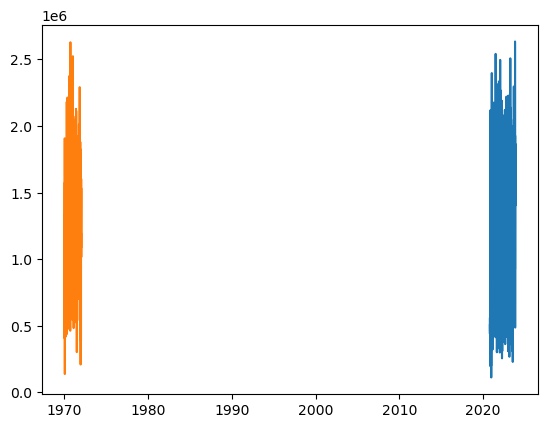

In [256]:
plt.plot(Category['Amount'], label='Original Data')
plt.plot(df)
plt.xlabel